# Data Analysis

## Import the Data

In [1]:
import sys
import os

# Append parent directory to path
sys.path.append("..")

# Change to parent directory
os.chdir("..")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from lib.load_dataset import get_original_dataset, get_ready_data

sns.set_theme()

pd.set_option("display.max_columns", 100)

data_by_expert = get_original_dataset(which="2019-2021")
data_ready = get_ready_data(which="2019-2021")


# Get report count of each patient
data_by_expert["RecordCount"] = pd.merge(
    data_by_expert["HlaseniIdDtb"],
    data_ready[["RecordId", "RecordCount"]],
    left_on="HlaseniIdDtb",
    right_on="RecordId",
    how="left",
)["RecordCount"]


"""
Take only patients with more than 1 record.
The patients with one record are artefacts from removing rejected records 
from the dataset before storing the data.
"""
print(
    "Number of patients with one record:",
    data_ready[data_ready["RecordCount"] == 1]["PatientId"].nunique()
)
print(
    "Number of patients with at least 4 records:",
    data_ready[data_ready["RecordCount"] >= 4]["PatientId"].nunique()
)

# Algorithmic filtering
data_by_expert_filtered = data_by_expert[
    (data_ready["AlgoFiltered"] == 0)
    & (data_ready["RecordCount"].between(2, 3))
]

data_ready = data_ready[
    (data_ready["AlgoFiltered"] == 0) & (data_ready["RecordCount"].between(2, 3))
]


data_by_expert["DgKod_first_3"] = data_by_expert["DgKod"].str[:3]

print("By expert data shape:", data_by_expert.shape)
print("Prepared data shape:", data_ready.shape)

Number of patients with one record: 1477
Number of patients with at least 4 records: 185
By expert data shape: (26552, 81)
Prepared data shape: (21297, 29)


In [9]:
data_ready["RecordCount"].value_counts()

RecordCount
2    18276
3     3021
Name: count, dtype: int64

In [55]:
tmp = data_by_expert[
    data_by_expert.groupby("PacientId")["PacientId"].transform("count") > 1
]
tmp = tmp.groupby("PacientId")["PacientId"].count()
print("Record count before algorithmic filtering\n")
print(tmp.value_counts(normalize=False))

print("\nRecord count after algorithmic filtering\n")
print(
    data_by_expert[data_by_expert["RecordCount"] > 1]
    .groupby("PacientId")["RecordCount"]
    .max()
    .value_counts(normalize=False)
)

Record count before algorithmic filtering

PacientId
2     7508
3     2207
4      555
5      166
6       55
7       23
8        3
15       1
16       1
11       1
10       1
13       1
Name: count, dtype: int64

Record count after algorithmic filtering

RecordCount
2    9138
3    1007
4     151
5      28
6       4
8       1
7       1
Name: count, dtype: int64


### Value Counts

In [91]:
data_ready["ICDLoc"].value_counts(normalize=True)

ICDLoc
-1    0.220547
 0    0.157910
-2    0.151101
 1    0.147298
 3    0.069446
 2    0.061699
 4    0.056487
 7    0.051650
 5    0.035545
 8    0.031272
 6    0.017045
Name: proportion, dtype: float64

In [27]:
data_by_expert["MorfologieGradingKod"].value_counts(dropna=False, normalize=True).head(10)

MorfologieGradingKod
9      0.291805
2      0.227252
1      0.154602
3      0.138370
NaN    0.127222
6      0.045194
4      0.010734
5      0.004180
8      0.000377
7      0.000264
Name: proportion, dtype: float64

In [28]:
data_ready[data_ready["MorphBehavior"] == 6]["MorphHistology"].value_counts(dropna=False)

MorphHistology
8140    492
8000    262
8010    177
8070    173
8480     15
8490     10
Name: count, dtype: int64

In [29]:
data_by_expert["MorfologieKlasifikaceKod"].value_counts(dropna=False, normalize=True).head(10)

MorfologieKlasifikaceKod
81403    0.245066
33333    0.097544
80703    0.091556
85003    0.055024
83103    0.024480
96803    0.022108
83803    0.021580
85002    0.020149
81406    0.020149
82603    0.011449
Name: proportion, dtype: float64

In [31]:
# Histology
(data_by_expert["MorfologieKlasifikaceKod"].astype(int) // 10).value_counts(
    dropna=False, normalize=True
).head(10)

MorfologieKlasifikaceKod
8140    0.277757
8070    0.104738
3333    0.097544
8500    0.075173
8310    0.024480
8380    0.024367
9680    0.022108
8000    0.021693
8010    0.018567
8211    0.018417
Name: proportion, dtype: float64

In [33]:
data_ready["MedicalInstituteType"].value_counts(normalize=True)

MedicalInstituteType
1    0.668733
2    0.216228
0    0.115040
Name: proportion, dtype: float64

In [36]:
tmp = data_by_expert[data_by_expert["DgKod"].str.len() == 4]
tmp = tmp[tmp["DgKod"].str[-1] == "9"]

print("Percentage of records with diagnosis code ending with 9:", round(tmp.shape[0] / data_by_expert.shape[0], 4))

Percentage of records with diagnosis code ending with 9: 0.1495


In [38]:
data_by_expert["TopografieKod"].value_counts(normalize=True).head(10)

TopografieKod
C809    0.071482
C619    0.058225
C209    0.052877
C649    0.048923
C504    0.039055
C421    0.037210
C187    0.031937
C509    0.024895
C199    0.023426
C341    0.023426
Name: proportion, dtype: float64

In [39]:
data_by_expert["TopografieKod"].str[-1].value_counts(normalize=True)

TopografieKod
9    0.485161
1    0.134265
0    0.110274
4    0.065946
2    0.057886
3    0.048509
7    0.034046
8    0.028171
5    0.024104
6    0.011638
Name: proportion, dtype: float64

<Axes: xlabel='top_spec', ylabel='count'>

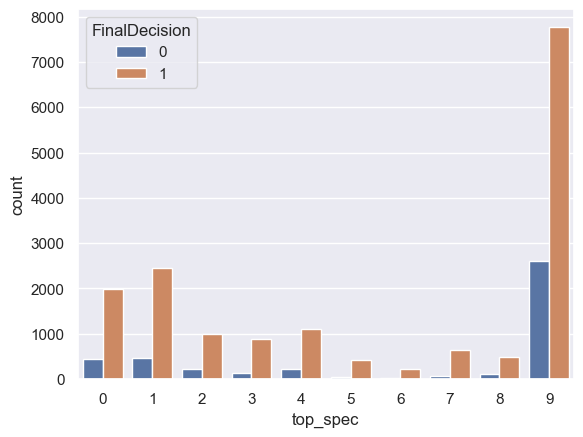

In [40]:
tmp = data_ready.copy()
tmp["top_spec"] = tmp["Topography"] % 10

sns.countplot(data=tmp, x="top_spec", hue="FinalDecision")

## Similarity of Reports per Patient

### Records Similarity (Number of Equal Columns)

In [57]:
def rows_similarity(a: pd.DataFrame, b: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the number of equal columns between two dataframes.
    The similarity is calculated for pairs of rows in i-th position
    in the df.

    Parameters:
    a: pd.DataFrame
        First dataframe
    b: pd.DataFrame
        Second dataframe

    Returns:
    pd.Series
        Rows similarity between each row of a and b
    """

    if a.shape != b.shape:
        raise ValueError("Dataframes must have the same shape")

    # Initialize an dictionary to store the Rows similarity
    rows_similarity = {
        "index_0": [],
        "index_1": [],
        "similarity": [],
    }

    # For each row in a and b, calculate the similarity
    for i in range(a.shape[0]):
        rows_similarity["index_0"].append(a.index[i])
        rows_similarity["index_1"].append(b.index[i])

        equal_count = (a.iloc[i] == b.iloc[i]).sum()

        rows_similarity["similarity"].append(equal_count)

    return pd.DataFrame(rows_similarity)


def calculate_similarities(
    df: pd.DataFrame,
    group_col: str,
    lower: int,
    upper: int,
    columns_to_drop: list | None = None,
) -> pd.DataFrame:
    """
    Calculate similarities of row pairs grouped by `group_col`.
    The dataset consists of the indices of the rows in the dataframe and
    the similrity percentage

    Parameters:
    df: pd.DataFrame
        Dataframe to calculate the similarity
    group_col: str
        Column to group by
    lower: int
        Lower bound of rows per group
    upper: int
        Upper bound of rows per group
    columns_to_drop: list
        Columns which to drop
    """

    if columns_to_drop is None:
        columns_to_drop = []

    df = df.copy()
    df["rank"] = df.groupby(group_col)[group_col].rank(method="first")
    # Take groups in range [lower, upper]
    counts = df.groupby(group_col)[group_col].transform("count")
    to_take = df[counts.between(lower, upper)][group_col]

    df = df[df[group_col].isin(to_take)]

    dfs = [df[df["rank"] == i] for i in range(1, upper + 1)]

    similarity_dfs = []
    for i in range(upper):
        for j in range(i + 1, upper):
            # Take only the patients which have reports both in i and j
            filtered_i = dfs[i][group_col].isin(dfs[j][group_col])
            filtered_j = dfs[j][group_col].isin(dfs[i][group_col])

            get_filtered_df = (
                lambda i, filtered_i: dfs[i][filtered_i]
                .sort_values(by=group_col)
                .drop(columns=columns_to_drop + ["rank"])
            )

            similarity_dfs.append(
                rows_similarity(
                    get_filtered_df(i, filtered_i),
                    get_filtered_df(j, filtered_j),
                )
            )

    return pd.concat(similarity_dfs, axis=0)

In [58]:
columns_to_drop = [
    "RecordCount",
    "RecordId",
    "NoveltyRank",
    "UnknownCount",
]

lower = 2
upper = 3
similarity_df = calculate_similarities(
    data_ready, "PatientId", lower, upper, columns_to_drop=columns_to_drop
)

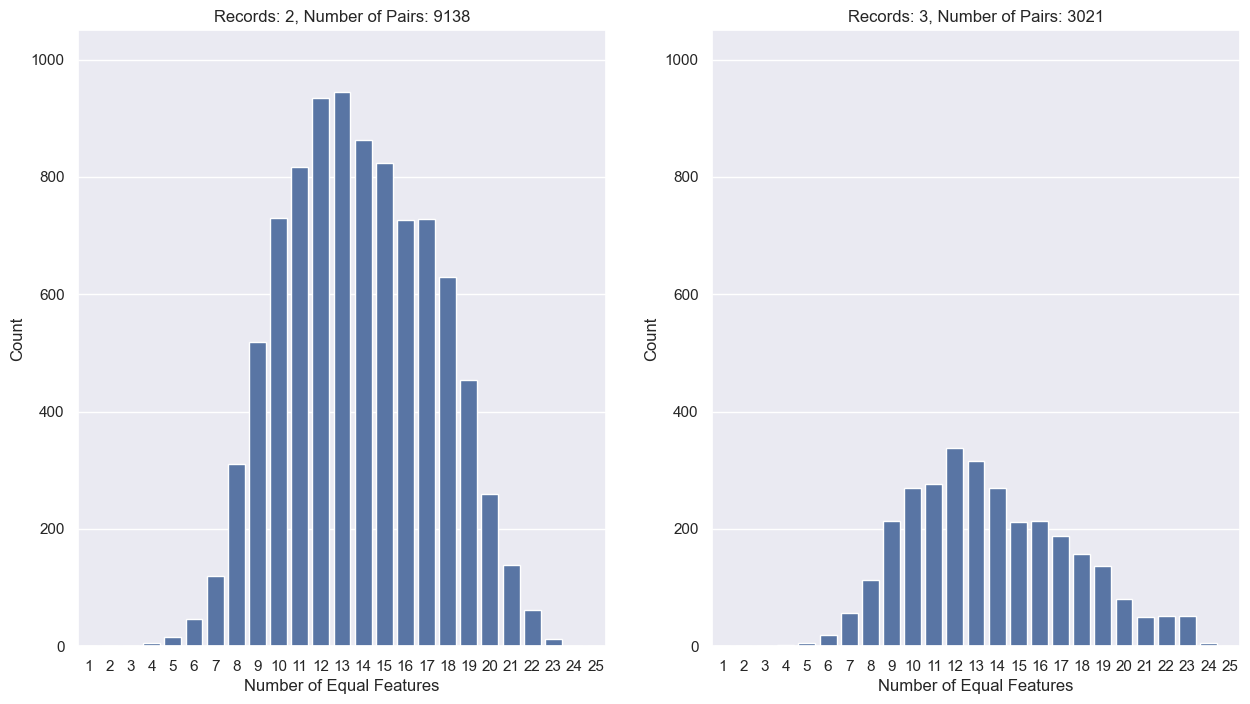

In [59]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))


def plot_similarity(df, lower, upper, ax, title=None, ylim=None, color=None):
    sim_df = calculate_similarities(
        df,
        "PatientId",
        lower,
        upper,
        columns_to_drop=columns_to_drop,
    )

    if title is None:
        title = ""
    else:
        title += ", "

    ax.set_title(title + f"Number of Pairs: {sim_df.shape[0]}")

    ax.set_xlabel("Number of Equal Features")
    ax.set_ylabel("Count")

    # return sns.histplot(sim_df["similarity"], bins=data_ready.shape[1], ax=ax)

    val_cnt = sim_df["similarity"].value_counts()

    n_cols = data_ready.shape[1] - len(columns_to_drop)
    # Add missing values in range [1, n_cols]
    for i in range(1, n_cols + 1):
        if i not in val_cnt.index:
            val_cnt[i] = 0

    # Sort the values by index
    val_cnt = val_cnt.sort_index()

    if ylim is not None:
        ax.set_ylim(ylim)

    return sns.barplot(
        x=val_cnt.index, y=val_cnt.values, ax=ax, color=color,
    )


for i, ax in zip(range(lower, upper + 1), axes.flatten()):
    plot_similarity(
        data_ready,
        i,
        i,
        ax=ax,
        title=f"Records: {i}",
        ylim=(0, 1050),
        color=None,
    )

None

In [65]:
# Number of pairs with only one feature different
similarity_df[
    similarity_df["similarity"] == (similarity_df["similarity"].max() - 1)
].shape

(64, 3)

## Columns Overlapping

In [67]:
def num_of_pairs(df: pd.DataFrame, group_col: str, n: int) -> int:

    counts = df.groupby(group_col)[group_col].transform("count")

    num_of_groups = df[counts == n][group_col].shape[0] // n
    num_pairs = (n * (n - 1) // 2) * num_of_groups

    return num_pairs


def _cols_overlap_proba(a: pd.DataFrame, b: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the probability that each columns overlaps in a and b.
    The similarity is calculated for pairs of rows in i-th position
    in the df.

    Parameters:
    a: pd.DataFrame
        First dataframe
    b: pd.DataFrame
        Second dataframe

    Returns:
    pd.Series
        The probability that each columns overlaps
    """

    if a.shape != b.shape:
        raise ValueError(
            f"Dataframes must have the same shape: {a.shape != b.shape}"
        )

    equal_df = a.reset_index(drop=True) == b.reset_index(drop=True)
    # Sum each column
    equal_df = equal_df.sum()

    # Return the probability that each column overlaps
    return equal_df / a.shape[0]


def cols_overlap_probability(
    df: pd.DataFrame, group_col, n, cols_to_drop=None
):
    if cols_to_drop is None:
        cols_to_drop = []

    df = df.copy()

    df["rank"] = df.groupby(group_col)[group_col].rank(method="first")

    counts = df.groupby(group_col)[group_col].transform("count")
    to_take = df[counts == n][group_col]
    df = df[df[group_col].isin(to_take)]

    dfs = [df[df["rank"] == i] for i in range(1, n + 1)]

    col_dfs = []
    for i in range(n):
        for j in range(i + 1, n):
            # Take only the patients which have reports both in i and j
            filtered_i = dfs[i][group_col].isin(dfs[j][group_col])
            filtered_j = dfs[j][group_col].isin(dfs[i][group_col])

            get_filtered_df = (
                lambda i, filtered_i: dfs[i][filtered_i]
                .sort_values(by=group_col)
                .drop(columns=columns_to_drop + ["rank"])
            )

            col_dfs.append(
                _cols_overlap_proba(
                    get_filtered_df(i, filtered_i),
                    get_filtered_df(j, filtered_j),
                )
            )

    final_df = col_dfs[0]
    for col_df in col_dfs[1:]:
        final_df = final_df + col_df

    return final_df / len(col_dfs)


def calculate_cols_overlap(
    df: pd.DataFrame,
    group_col: str,
    lower: int,
    upper: int,
    columns_to_drop: list | None = None,
) -> pd.DataFrame:
    """
    Calculate similarities of row pairs grouped by `group_col`.
    The dataset consists of the indices of the rows in the dataframe and
    the similrity percentage

    Parameters:
    df: pd.DataFrame
        Dataframe to calculate the similarity
    group_col: str
        Column to group by
    lower: int
        Lower bound of rows per group
    upper: int
        Upper bound of rows per group
    columns_to_drop: list
        Columns which to drop
    """

    col_dfs = []
    for i in range(lower, upper + 1):
        col_dfs.append(
            cols_overlap_probability(
                df, group_col, i, cols_to_drop=columns_to_drop
            )
        )

    weights = np.array(
        [num_of_pairs(df, group_col, i) for i in range(lower, upper + 1)]
    )
    weights = weights / weights.sum()

    final_df = col_dfs[0] * weights[0]
    for i, col_df in enumerate(col_dfs[1:]):
        final_df = final_df + col_df * weights[i + 1]

    return final_df

### Plots

<Axes: xlabel='Columns', ylabel='Probability of Overlap'>

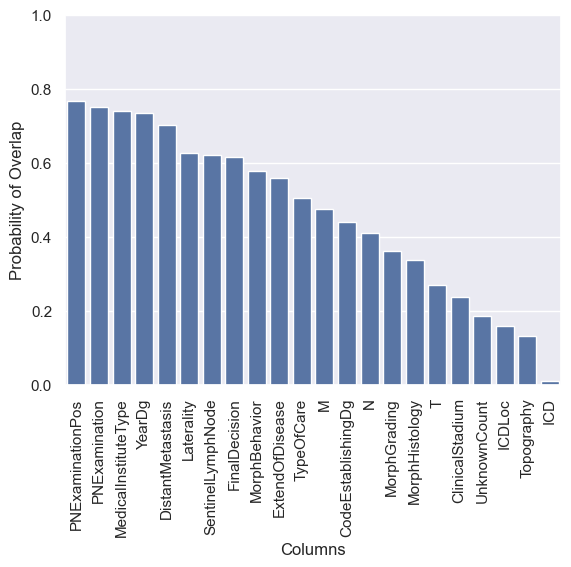

In [68]:
columns_to_drop = [
    "NoveltyRank",
    "RecordId",
    "RecordCount",
    "PatientId",
    "ICDRangeC76-C80",
    "AlgoFiltered",
    "CreatedWithBatch",
]

cols_ovelap_df = calculate_cols_overlap(
    data_ready,
    "PatientId",
    2,
    3,
    columns_to_drop=columns_to_drop,
).sort_values(ascending=False)

_, ax = plt.subplots()

ax.tick_params(axis="x", labelrotation=90)
ax.set_xlabel("Columns")
ax.set_ylabel("Probability of Overlap")
ax.set_ylim(0, 1)

sns.barplot(x=cols_ovelap_df.index, y=cols_ovelap_df, ax=ax)

In [72]:
cols_ovelap_df["ICD"].round(3)

0.008

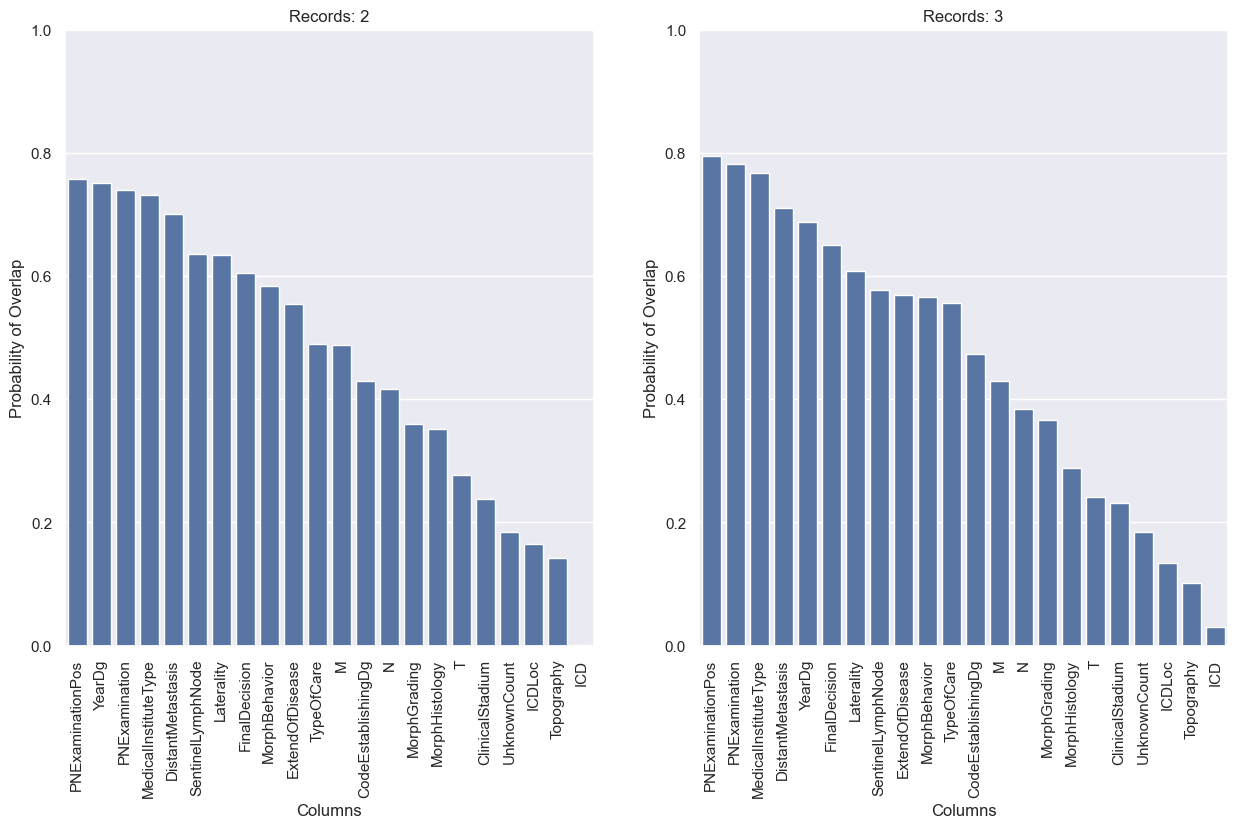

In [75]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

lower = 2
upper = 3

get_df = lambda l, u: calculate_cols_overlap(
    data_ready, "PatientId", l, u, columns_to_drop=columns_to_drop
).sort_values(ascending=False)

for i, ax in zip(range(lower, upper + 1), axes.flatten()):
    # cols_df = get_df(i, i) if i != upper + 2 else get_df(lower, upper)
    cols_df = get_df(i, i)

    ax.tick_params(axis="x", labelrotation=90)
    ax.set_xlabel("Columns")
    ax.set_ylabel("Probability of Overlap")
    ax.set_ylim(0, 1)

    sns.barplot(
        x=cols_df.index, y=cols_df, ax=ax, color=None if i != 5 else "#104BAB"
    )

    # ax.set_title(f"Records: {i if i != 5 else '2-4'}")
    ax.set_title(f"Records: {i}")

None

In [77]:
get_df(2, 2)["ICDLoc"].round(2)

0.17

## Missing and Unknown Values

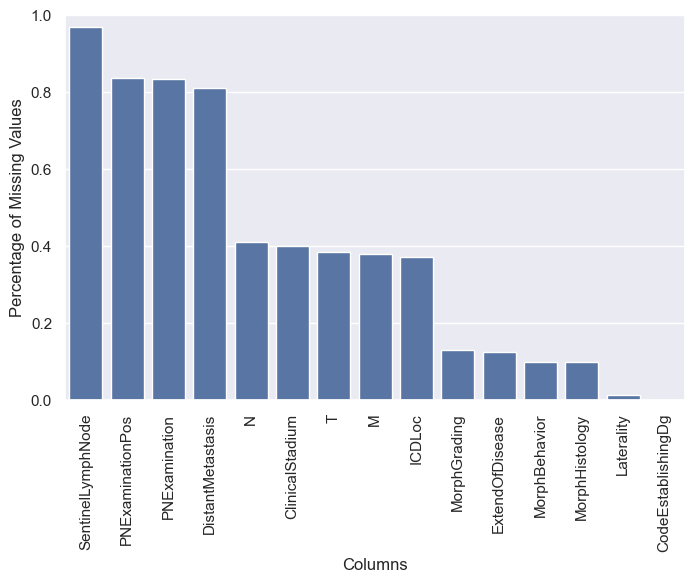

In [81]:
miss_dict = dict()

for col in data_ready.columns:
    num = data_ready[data_ready[col] < 0][col].shape[0] / data_ready.shape[0]
    if num != 0:
        miss_dict[col] = [num]

    # print(f"{col}: {num}")

miss_df = pd.DataFrame(miss_dict)
miss_df = miss_df.sort_values(by=miss_df.index[0], ascending=False, axis=1)

_, ax = plt.subplots(figsize=(8, 5))

# Rotate x labels
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Columns")
ax.set_ylabel("Percentage of Missing Values")
ax.set_ylim(0, 1)


sns.barplot(x=miss_df.columns, y=miss_df.iloc[0])
None

<Axes: xlabel='T', ylabel='count'>

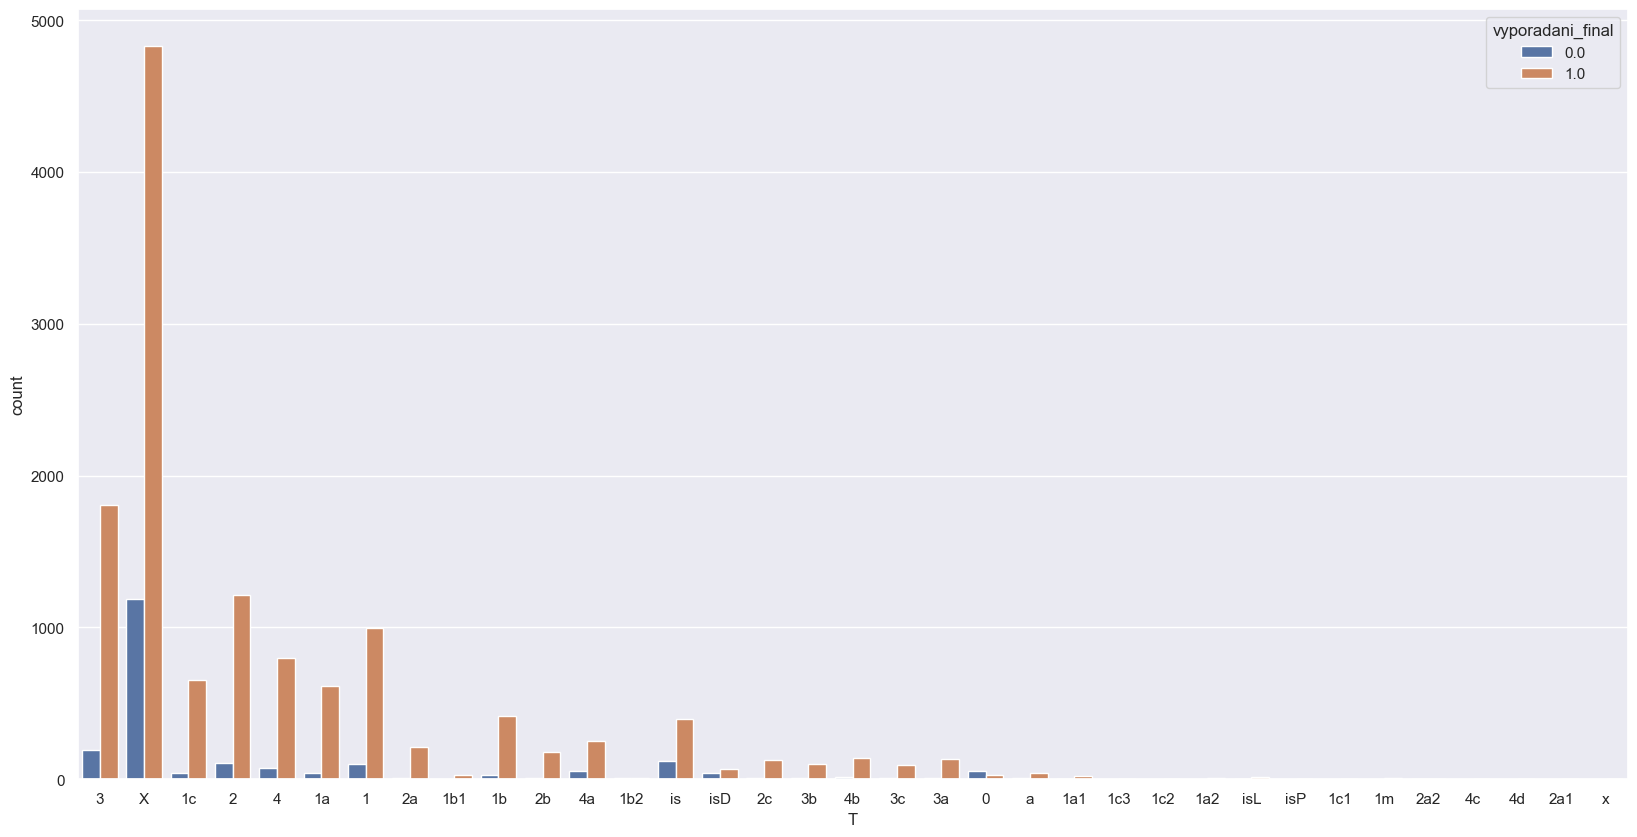

In [83]:
_, ax = plt.subplots(figsize=(20, 10))

sns.countplot(
    data=data_by_expert_filtered,
    # x="StanoveniDgKod",
    x="T",
    hue="vyporadani_final",
    ax=ax
)

<Axes: xlabel='MedicalInstituteType', ylabel='count'>

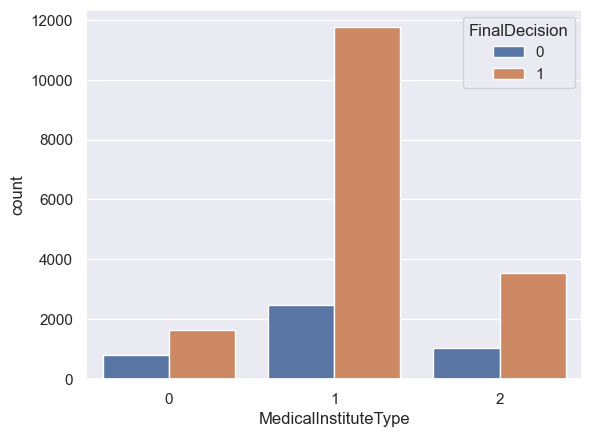

In [84]:
sns.countplot(
    data=data_ready,
    x="MedicalInstituteType",
    hue="FinalDecision",
    ax=None,
)

In [85]:
isnull_data = (data_ready < 0).astype(int).replace(
    {0: "Known", 1: "Unknown"}
)

isnull_data["FinalDecision"] = (
    data_ready["FinalDecision"]
    .astype(int)
    .replace({0: "Declined", 1: "Accepted"})
)

In [86]:
with pd.option_context('future.no_silent_downcasting', True):
    null_cols = isnull_data.loc[:, isnull_data.columns != "FinalDecision"].replace(
        {"Known": 0, "Unknown": 1}
    ).sum()

(null_cols[null_cols > 0] / data_ready.shape[0]).sort_values()

CodeEstablishingDg    0.000047
Laterality            0.012396
MorphHistology        0.097948
MorphBehavior         0.098042
ExtendOfDisease       0.124853
MorphGrading          0.129502
ICDLoc                0.371649
M                     0.379255
T                     0.383387
ClinicalStadium       0.399869
N                     0.409353
DistantMetastasis     0.809738
PNExamination         0.833028
PNExaminationPos      0.836221
SentinelLymphNode     0.968165
dtype: object

In [87]:
null_cols[null_cols > 0].shape[0] / null_cols.shape[0]

0.5357142857142857

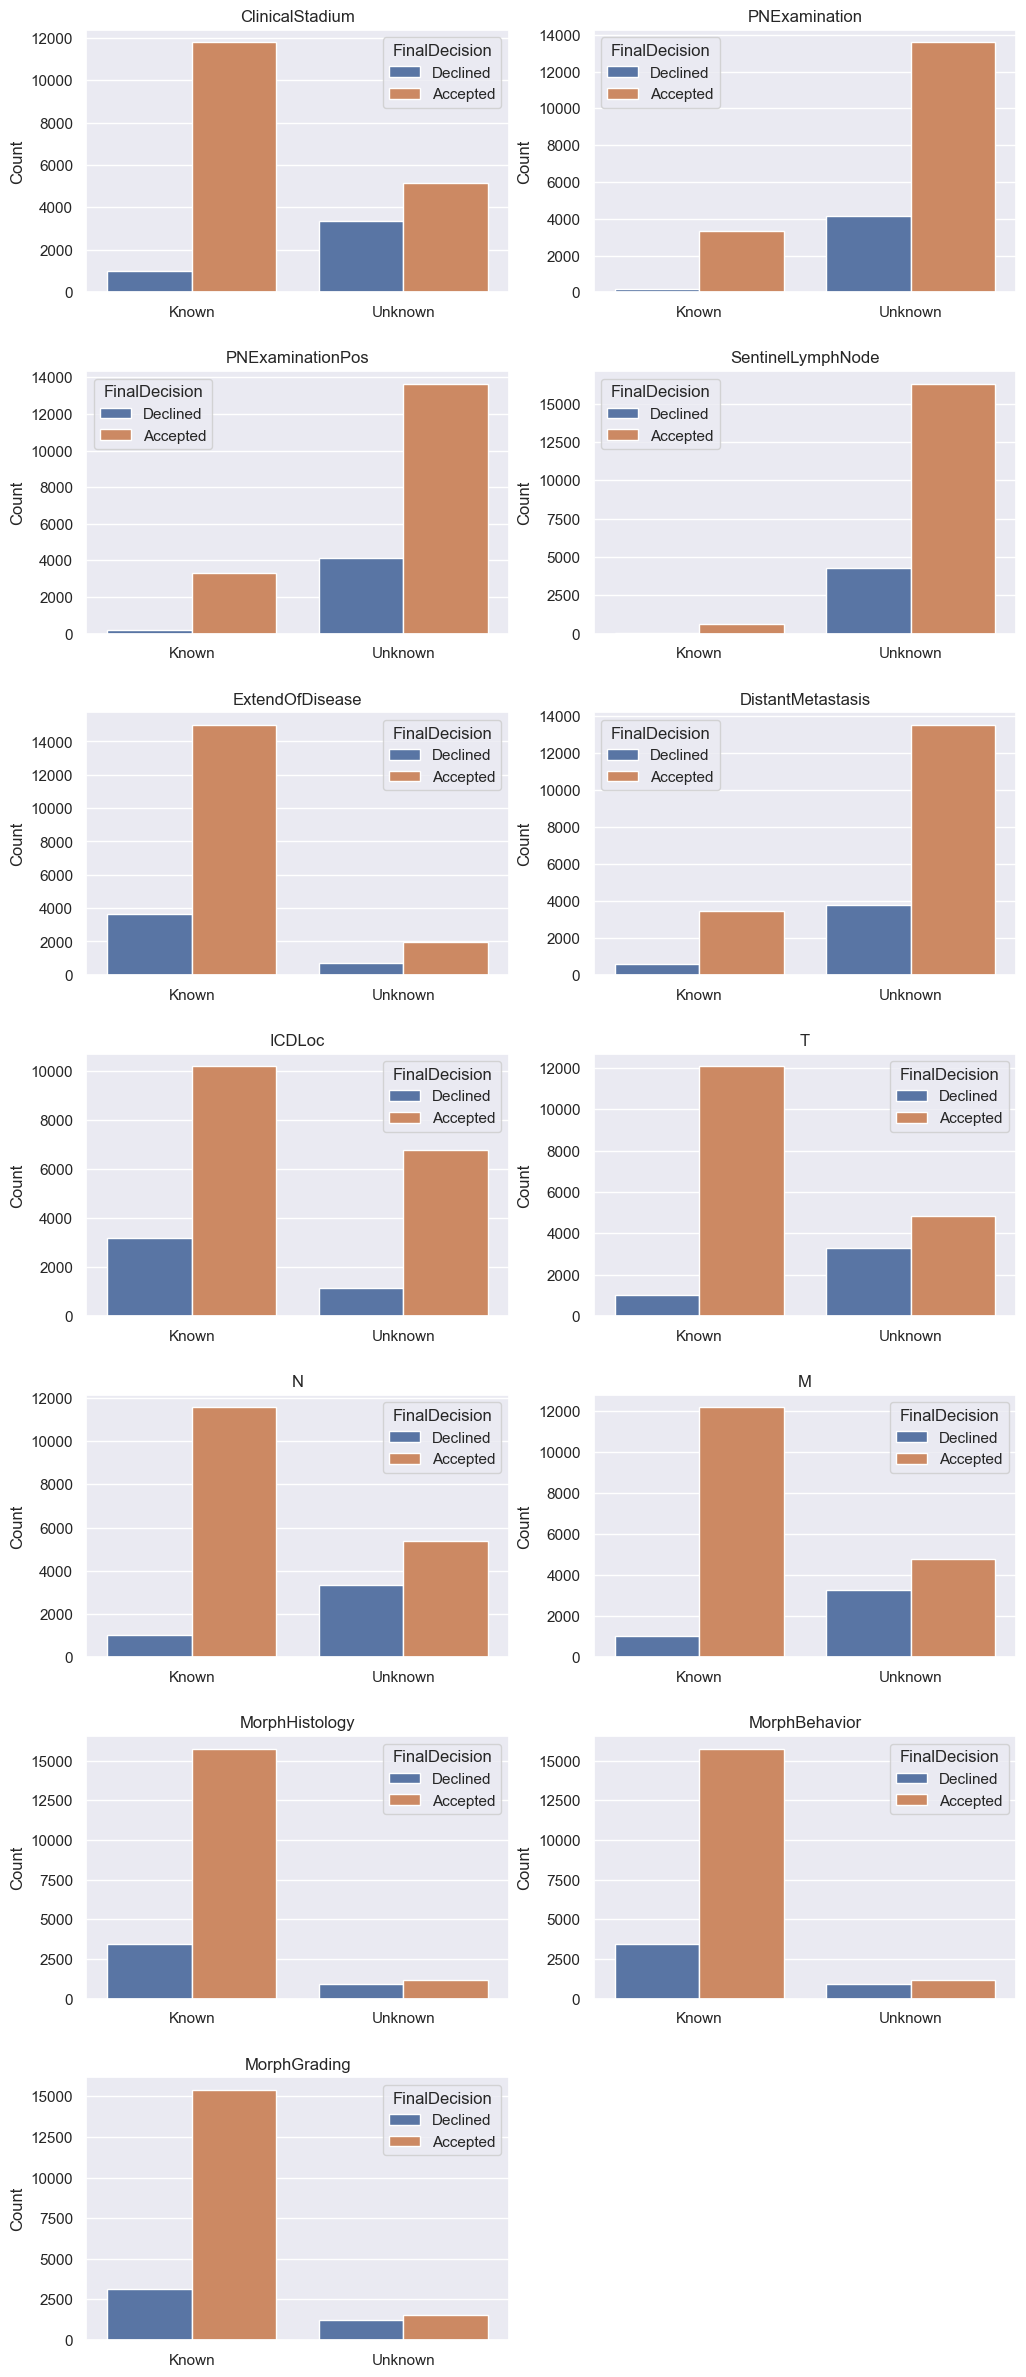

In [88]:
cols_to_plot = [
    "ClinicalStadium",
    "PNExamination",
    "PNExaminationPos",
    "SentinelLymphNode",
    "ExtendOfDisease",
    "DistantMetastasis",
    "ICDLoc",
    # "Laterality",
    "T",
    "N",
    "M",
    "MorphHistology",
    "MorphBehavior",
    "MorphGrading",
]

_, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 30))

for col, ax in zip(cols_to_plot, axes.flatten()):
    sns.countplot(
        isnull_data,
        x=col,
        hue="FinalDecision",
        ax=ax,
        order=["Known", "Unknown"],
        hue_order=["Declined", "Accepted"],
    )
    # ax.set_xlabel(col)
    ax.set_title(col)
    ax.set_xlabel("")

    ax.set_ylabel("Count")

axes[6, 1].set_axis_off()
plt.subplots_adjust(hspace=0.3)

# axes[4, 2].set_axis_off()

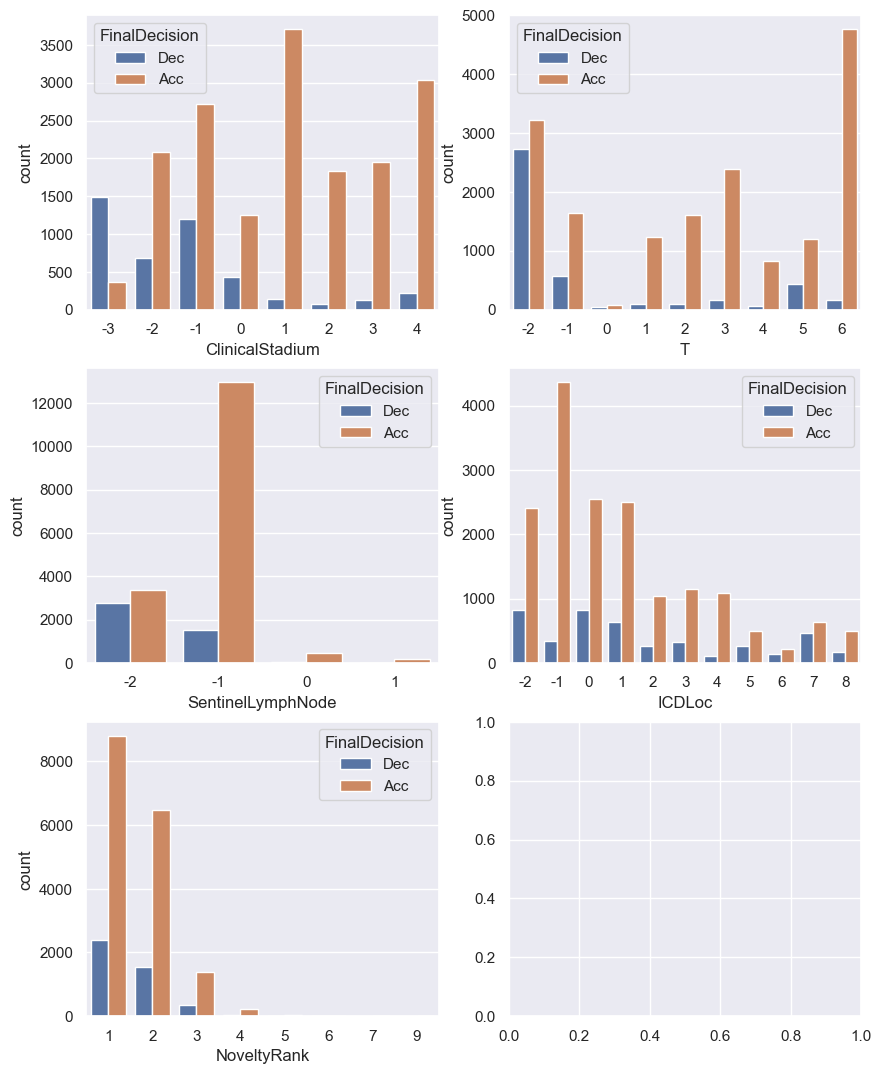

In [89]:
# tmp = data_ready[data_ready["ICDLoc"] == -1]
tmp = data_ready.copy()
tmp["FinalDecision"] = (
    tmp["FinalDecision"].astype(int).replace({0: "Dec", 1: "Acc"})
)
_, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 13)) # 8

for col, ax in zip(
    ["ClinicalStadium", "T", "SentinelLymphNode", "ICDLoc", "NoveltyRank"], axes.flatten()
):
    sns.countplot(
        tmp,
        x=col,
        ax=ax,
        hue="FinalDecision",
        hue_order=["Dec", "Acc"],
    )

del tmp

In [13]:
isnull_data["MorphHistology"].sum()

2304

### Number of Unknown Values Histogram

<Axes: xlabel='unknown_count', ylabel='count'>

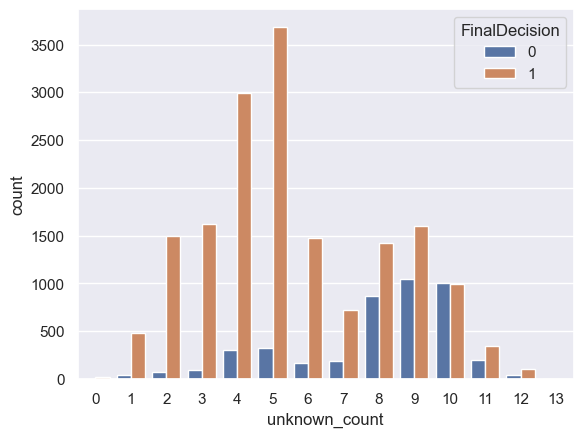

In [26]:
sns.countplot(data=data_ready,
              x="unknown_count",
              hue="FinalDecision",
)